In [30]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd

In [31]:
# data = pd.read_csv('./datasets/19_retweet_text_doc2vec_new_text8.csv', sep='=', encoding='utf8')
data = pd.read_csv('./datasets/15_retweet_text_tfidf_robert_version.csv', sep=',', encoding='utf8')
print(data.columns)

data_selected = data.loc[:, 'feature_0':]
print(data_selected.shape)
print(data_selected.columns)

Index(['Unnamed: 0', 'is_RT', 'retweet_from', 'whole_tweet_text',
       'original_text', 'retweet_text', 'stopwords_removed_retweet_text',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_2416', 'feature_2417', 'feature_2418', 'feature_2419',
       'feature_2420', 'feature_2421', 'feature_2422', 'feature_2423',
       'feature_2424', 'feature_2425'],
      dtype='object', length=2433)
(610, 2426)
Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_2416', 'feature_2417', 'feature_2418', 'feature_2419',
       'feature_2420', 'feature_2421', 'feature_2422', 'feature_2423',
       'feature_2424', 'feature_2425'],
      dtype='object', length=2426)


# TruncatedSVD

In [ ]:
# perform TruncatedSVD
svd = TruncatedSVD(n_components=500, n_iter=10, random_state=100)
svd.fit(data_selected)

print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
print(svd.singular_values_)

# fit transform the data
data_svd = svd.fit_transform(data_selected)

# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
data_svd = data_selected.to_numpy()

clustering = DBSCAN(eps=1, min_samples=2, algorithm='ball_tree').fit(data_svd)
print(clustering.labels_)
print(clustering)
print(set(clustering.labels_.tolist()))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
  1  2 -1 -1 -1  2 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  4  4  4 -1 -1  5
 -1 -1  6 -1 -1 -1 -1 -1  5  5  5 -1 -1  6 -1 -1 -1  7 -1 -1 -1 -1 -1 -1
 -1 -1 -1  7  8  7  9 -1 -1 -1 10 11 12 -1 12 -1 -1 -1 -1 -1 13 -1 -1 14
 -1 -1 -1 -1 15 -1 10 11 -1 -1 -1 11 -1 -1 -1 -1 15 -1 -1 11 -1  9 14 -1
 -1 -1 -1 11 -1 -1 -1 -1 -1 16 -1 -1 -1 -1 -1 -1  7 -1 17 -1 -1 -1 -1 -1
 -1 -1 17 -1 -1 -1 -1 -1 18 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 16
 -1 -1 -1 -1 -1 18 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 19 -1
 -1 -1 -1 -1 20 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 21 -1 22 -1
 -1 -1 -1 21 -1 -1 21 21 -1 -1 -1 -1 -1 -1 13 -1 -1 -1 -1 -1 -1 -1 19 -1
 -1 -1 -1 20 23 22 -1 -1 -1 19 -1 -1 -1 -1 -1 -1 -1

# Graph out result

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [35]:
# compress the data using tdidf vector

# perform TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=10, random_state=100)
svd.fit(data_selected)

print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
print(svd.singular_values_)

# fit transform the data
data_graph = svd.fit_transform(data_selected)

print(data_graph[:10])

0.023060546108608464
[0.01392906 0.00913149]
[4.22861194 2.40685328]
[[ 0.0705522  -0.1194539 ]
 [ 0.06437788 -0.12703917]
 [ 0.03062635 -0.06781766]
 [ 0.02252675 -0.04455517]
 [ 0.11338845  0.0534507 ]
 [ 0.05996616  0.02248409]
 [ 0.05873033  0.02093971]
 [ 0.03739607  0.0026585 ]
 [ 0.00678887 -0.01062816]
 [ 0.00886205 -0.0107663 ]]


In [36]:
data_pred = pd.DataFrame(data=data_graph,
                        columns=['PC1', 'PC2'])

data_pred.loc[:, 'Pred'] = clustering.labels_

print(data_pred.head())

        PC1       PC2  Pred
0  0.070552 -0.119454    -1
1  0.064378 -0.127039    -1
2  0.030626 -0.067818    -1
3  0.022527 -0.044555    -1
4  0.113388  0.053451    -1


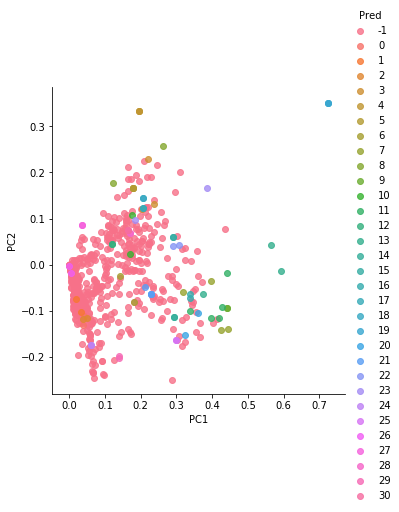

In [37]:
# graph out the result

facet = sns.lmplot(data=data_pred, x='PC1', y='PC2', hue='Pred',
                  fit_reg=False, legend=True, legend_out=True)

# Concat the data back to original dataset

In [38]:
output = pd.concat([data, data_pred], axis=1)
output = output.loc[:, 'Pred']

print(output.shape)

output.to_csv("./predictions/retweet_DBSCAN_predictions_doc2vec.csv", sep='\t',
             encoding='utf8', index=True)

(610,)
